In [98]:
from sympy import *
import sympy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
def_color=plt.rcParams['axes.color_cycle']
matplotlib.rcParams.update({'font.size': 12})

w=Symbol('w');
xp=Symbol('xp');
yp=Symbol('yp');
xa=Symbol('xa');
ya=Symbol('ya');
aaa=Symbol('aaa');
aap=Symbol('aap');
apa=Symbol('apa');
app=Symbol('app');
aup=Symbol('aup');
aua=Symbol('aua');
u0=Symbol('u0');

#Symbolic solution of the linearized equations
#(after submitting P=P0cos(wt+phip),A=A0cos(wt+phia))
sol=solve([w*yp+app*xp+aap*xa+aup*u0,\
       -w*xp+app*yp+aap*ya,\
       w*ya+apa*xp+aaa*xa+aua*u0,\
       -w*xa+apa*yp+aaa*ya],
      [xp,yp,xa,ya])


#get phase and amplitude
phip=atan2(sol[yp],sol[xp])
phia=atan2(sol[ya],sol[xa])
P0=sqrt(sol[xp]**2+sol[yp]**2)
A0=sqrt(sol[xa]**2+sol[ya]**2)

#Substitute the quasi steady state solution of the model
ap=Symbol('ap');
aa=Symbol('aa');
var_list=[app,aap,aup,apa,aaa,aua]
crh_list=[-1/3*ap,-1/3*ap,2/3*ap,1/3*aa,-2/3*aa,1/3*aa]

phip_crh=simplify(phip.subs(zip(var_list,crh_list)))
phia_crh=simplify(phia.subs(zip(var_list,crh_list)))
P0_crh=simplify(P0.subs(zip(var_list,crh_list)))
A0_crh=simplify(A0.subs(zip(var_list,crh_list)))
xa_crh=simplify(sol[xa].subs(zip(var_list,crh_list)))
xp_crh=simplify(sol[xp].subs(zip(var_list,crh_list)))
eig_crh=list(Matrix([[-ap/3,-ap/3],[aa/3,-2*aa/3]]).eigenvals().keys())
det=Matrix([[-ap/3,-ap/3],[aa/3,-2*aa/3]]).det()
tr=Matrix([[-ap/3,-ap/3],[aa/3,-2*aa/3]]).trace()

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


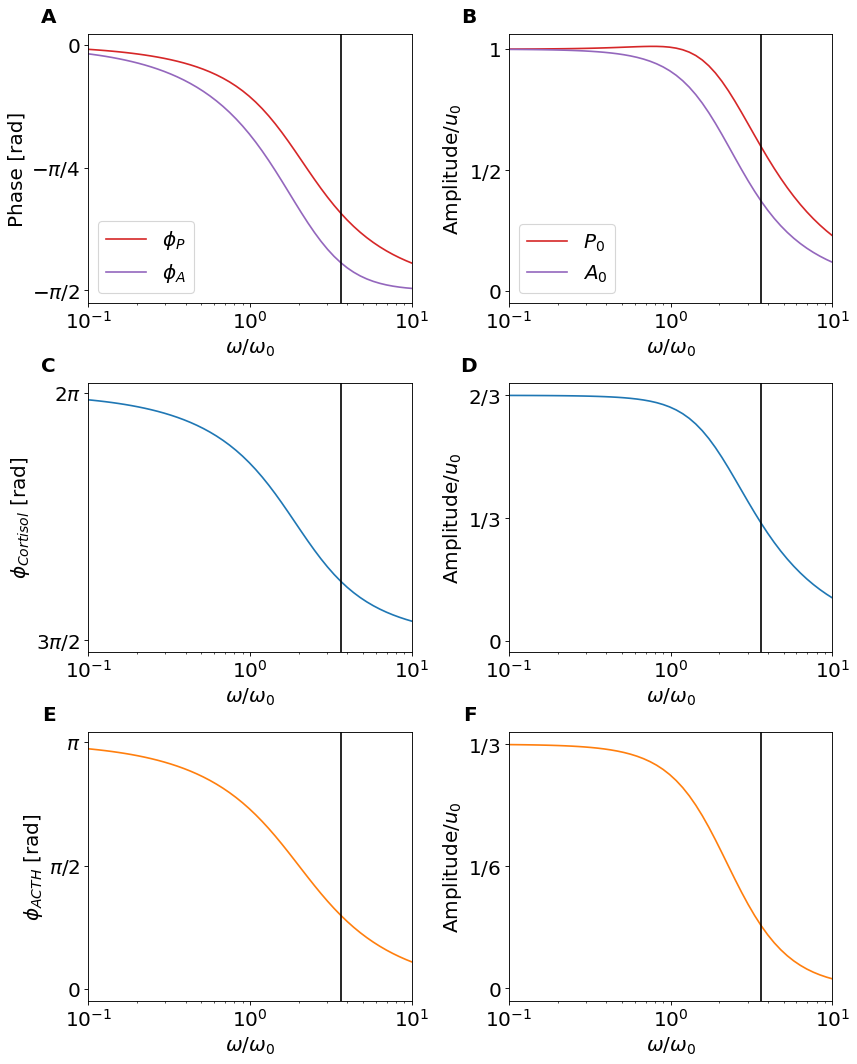

In [100]:
#This code generates the amplitude and phase dependency on omega/omega0
#(This is figure S1 in the draft version of 17.3.19)

def subs_params(expression):
    '''Substituting u0,ap and aa to get a numeric value 
    of phase and amplitude as function of omega'''
    exp_sub=expression.subs([(u0,1),(ap,1),(aa,1)])
    inp=np.logspace(-2,2,100)
    out=np.zeros(inp.shape[0])
    for i in range(inp.shape[0]):
        out[i]=exp_sub.subs([(w,inp[i])])
    return inp,out

def sum_sine_waves(amp1,phi1,amp2,phi2):
    '''Addition of two sine waves with given phases and amps to 
    obtain the phase and amp of combination'''
    if amp1<0:
        amp1=-amp1
        phi1=phi1+np.pi
    if amp2<0:
        amp2=-amp2
        phi2=phi2+np.pi
    delta=phi2-phi1
    sindelta=np.sin(delta)
    cosdelta=np.cos(delta)
    amp=np.sqrt(amp1**2+amp2**2+2*amp1*amp2*cosdelta)
    phase=np.arctan2(amp2*sindelta,(amp1+amp2*cosdelta))
    phase=np.mod(phi1+phase,2*np.pi)
    return amp,phase

def get_cort_ACTH(P0,phip,A0,phia):
    '''
    Compute cortisol and ACTH values from amps and phases of the glands
    '''
    n=P0.shape[0]
    cort_phase=np.zeros(n)
    cort_amp=np.zeros(n)
    ACTH_phase=np.zeros(n)
    ACTH_amp=np.zeros(n)
    for i in range(n):
        cort_amp[i],cort_phase[i]=sum_sine_waves(P0[i]/3,phip[i],A0[i]/3,phia[i])
        ACTH_amp[i],ACTH_phase[i]=sum_sine_waves(P0[i]/3,phip[i],-2*A0[i]/3,phia[i])
    return cort_amp,cort_phase,ACTH_amp,ACTH_phase


#Generate phases and amps for A,P,cort and ACTH
omega,phip_val=subs_params(phip_crh)
omega,phia_val=subs_params(phia_crh)
omega,P0_val=subs_params(P0_crh)
omega,A0_val=subs_params(A0_crh)
cort0_val,phicort_val,ACTH0_val,phiACTH_val,=get_cort_ACTH(P0_val,phip_val,A0_val,phia_val)
omega0=(det.subs([(aa,1),(ap,1)])-tr.subs([(aa,1),(ap,1)])**2/4)**0.5



fig=plt.figure(figsize=(12, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.3,hspace=0.3)
matplotlib.rcParams.update({'font.size': 18})



#Plot phases of A and P as function of omega
ax=fig.add_subplot(3,2,1)
omega,phip_val=subs_params(phip_crh)
plt.semilogx(omega/omega0,phip_val,color=def_color[3])
plt.xlabel('$\omega/\omega_0$')

omega,phia_val=subs_params(phia_crh)
plt.semilogx(omega/omega0,phia_val,'-',color=def_color[4])
plt.yticks([0,-np.pi/4,-np.pi/2],['$0$','$-\pi/4$','$-\pi/2$'])
plt.ylabel('Phase [rad]')
plt.legend(['$\phi_P$','$\phi_A$'])
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='right')


#Plot amplitudes of A and P as function of omega
ax=fig.add_subplot(3,2,2)
omega,P0_val=subs_params(P0_crh)
plt.semilogx(omega/omega0,P0_val,color=def_color[3])
plt.xlabel('$\omega/\omega_0$')

omega,A0_val=subs_params(A0_crh)
plt.semilogx(omega/omega0,A0_val,'-',color=def_color[4])
plt.yticks([0,1/2,1],['$0$','$1/2$','$1$'])
plt.ylabel('Amplitude/$u_0$')
plt.legend(['$P_0$','$A_0$'])
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'B', transform=ax.transAxes, fontweight='bold', va='top', ha='right')



#Plot phase of cortisol as function of omega
ax=fig.add_subplot(3,2,3)
plt.semilogx(omega/omega0,phicort_val,color=def_color[0])
plt.yticks([3*np.pi/2,2*np.pi],['$3\pi/2$','$2\pi$'])
plt.ylabel('$\phi_{Cortisol}$ [rad]')
plt.xlabel('$\omega/\omega_0$')
#plt.legend(['$\phi_{ACTH}$','$\phi_{Cortisol}$'])
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='right')


#Plot phase of ACTH as function of omega
ax=fig.add_subplot(3,2,5)
plt.semilogx(omega/omega0,phiACTH_val,'-',color=def_color[1])
plt.yticks([0,np.pi/2,np.pi],['$0$','$\pi/2$','$\pi$'])
plt.ylabel('$\phi_{ACTH}$ [rad]')
plt.xlabel('$\omega/\omega_0$')
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'E', transform=ax.transAxes, fontweight='bold', va='top', ha='right')




#Plot amplitude of cortisol as function of omega
ax=fig.add_subplot(3,2,4)
plt.semilogx(omega/omega0,cort0_val,color=def_color[0])
plt.yticks([0,1/3,2/3],['$0$','$1/3$','$2/3$'])
plt.ylabel('Amplitude/$u_0$')
plt.xlabel('$\omega/\omega_0$')
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'D', transform=ax.transAxes, fontweight='bold', va='top', ha='right')


#Plot amplitude of ACTH as function of omega
ax=fig.add_subplot(3,2,6)
plt.semilogx(omega/omega0,ACTH0_val,'-',color=def_color[1])
plt.yticks([0,1/6,1/3],['$0$','$1/6$','$1/3$'])
plt.ylabel('Amplitude/$u_0$')
plt.xlabel('$\omega/\omega_0$')
plt.xlim([0.1,10])
plt.axvline(x=2*np.pi/6/omega0,color='black')
ax.text(-0.1, 1.1, 'F', transform=ax.transAxes, fontweight='bold', va='top', ha='right')

plt.savefig('../figures/S1_oscillator_theory.pdf',bbox_inches='tight',dpi=600)



In [10]:
#Use 1/aa and 1.ap instead of aa and ap
timescales=np.logspace(-0.5,1,40)
phia_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
phip_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
P0_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
A0_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
eig_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
for i1,t1 in enumerate(timescales):
    for i2,t2 in enumerate(timescales):
        #xa_crh_numeric=xa_crh.subs([(w,2*np.pi),(ap,12*t1),(aa,12*t2),(u0,1)])
        #xp_crh_numeric=xp_crh.subs([(w,2*np.pi),(ap,12*t1),(aa,12*t2),(u0,1)])
        phia_crh_numeric[i1,i2]=phia_crh.subs([(w,2*np.pi),(ap,12/t1),(aa,12/t2),(u0,1)])
        phip_crh_numeric[i1,i2]=phip_crh.subs([(w,2*np.pi),(ap,12/t1),(aa,12/t2),(u0,1)])
        P0_crh_numeric[i1,i2]=P0_crh.subs([(w,2*np.pi),(ap,12/t1),(aa,12/t2),(u0,1)])
        A0_crh_numeric[i1,i2]=A0_crh.subs([(w,2*np.pi),(ap,12/t1),(aa,12/t2),(u0,1)])
        eig_crh_numeric[i1,i2]=max([np.real(np.complex(x.subs([(ap,1/t1),(aa,1/t2)]))) for x in eig_crh])




In [11]:
#As function of 1/ap and 1/aa or ap and aa doesn't matter

#We add sine waves to compute expected cortisol and ACTH 
def sum_sine_waves(amp1,phi1,amp2,phi2):
    if amp1<0:
        amp1=-amp1
        phi1=phi1+np.pi
    if amp2<0:
        amp2=-amp2
        phi2=phi2+np.pi
    delta=phi2-phi1
    sindelta=np.sin(delta)
    cosdelta=np.cos(delta)
    amp=np.sqrt(amp1**2+amp2**2+2*amp1*amp2*cosdelta)
    phase=np.arctan2(amp2*sindelta,(amp1+amp2*cosdelta))
    phase=np.mod(phi1+phase,2*np.pi)
    return amp,phase

#Computation of ACTH and cortisol phases as function of aa and ap 
cort0_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
phicort_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
ACTH0_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])
phiACTH_crh_numeric=np.zeros([timescales.shape[0],timescales.shape[0]])

for i1,t1 in enumerate(timescales):
    for i2,t2 in enumerate(timescales):
        cort0_crh_numeric[i1,i2],phicort_crh_numeric[i1,i2]=\
        sum_sine_waves(1/3*P0_crh_numeric[i1,i2],phip_crh_numeric[i1,i2],1/3*A0_crh_numeric[i1,i2],phia_crh_numeric[i1,i2])
        ACTH0_crh_numeric[i1,i2],phiACTH_crh_numeric[i1,i2]=\
        sum_sine_waves(1/3*P0_crh_numeric[i1,i2],phip_crh_numeric[i1,i2],-2/3*A0_crh_numeric[i1,i2],phia_crh_numeric[i1,i2])
               




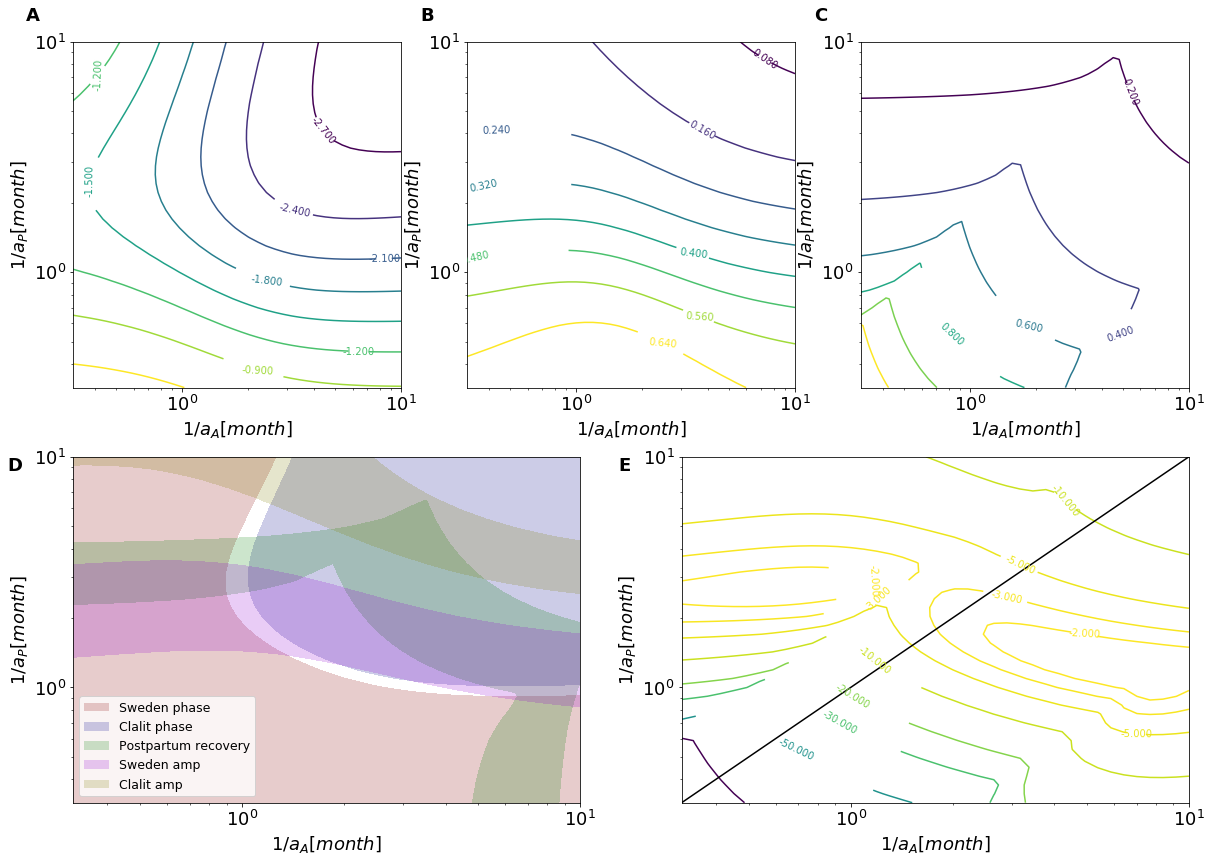

In [38]:
#Plot of parameter estimation figure

fig=plt.figure(figsize=(20,14))

############
# Cortisol phase contours as function of parameters for seasonal data
############
ax=plt.subplot(2,3,1)
phicort_crh_numeric=phicort_crh_numeric-2*np.pi*(phicort_crh_numeric>np.pi)
CS = ax.contour(timescales, timescales,phicort_crh_numeric*12/2/np.pi)
ax.clabel(CS, inline=-2, fontsize=10)
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_xlabel('$1/a_A[month]$')
ax.set_ylabel('$1/a_P[month]$')
#ax.set_title('Cortisol phase [month]')
ax.text(-0.1, 1.1, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='right')



############
# Cortisol amplitude contours as function of parameters for seasonal data
############
ax=plt.subplot(2,3,2)
CS = ax.contour(timescales, timescales,cort0_crh_numeric)
ax.clabel(CS, inline=-2, fontsize=10)
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_xlabel('$1/a_A[month]$')
ax.set_ylabel('$1/a_P[month]$')
#ax.set_title('Cortisol amplitude')
ax.text(-0.1, 1.1, 'B', transform=ax.transAxes, fontweight='bold', va='top', ha='right')



############
# Postpartum recovery contours as function of parameters for seasonal data
############
ax=plt.subplot(2,3,3)
CS = ax.contour(timescales, timescales,abs(eig_crh_numeric)**(2/3))
ax.clabel(CS, inline=-2, fontsize=10)
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_xlabel('$1/a_A[month]$')
ax.set_ylabel('$1/a_P[month]$')
#ax.set_title('Postpartum cortisol recovery [month]')
ax.text(-0.1, 1.1, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='right')




############
# Possible values of paramteres based on Clalit's seasonality, Sweden seasonality and the postpartum data
############
ax=plt.subplot(2,2,3)

import matplotlib.patches as mpatches

#Sweden phase
alpha=0.2
CS = ax.contourf(timescales, timescales,phicort_crh_numeric*12/2/np.pi,levels=[-1.9,-0.43],colors='darkred',origin='lower',extend='neither',alpha=alpha)

#Clalit phase
CS = ax.contourf(timescales, timescales,phicort_crh_numeric*12/2/np.pi,levels=[-3.74,-2.00],colors='darkblue',origin='lower',extend='neither',alpha=alpha)

#pregnancy contours
CS = ax.contourf(timescales, timescales,abs(eig_crh_numeric)**(2/3),levels=[0.057*30/7,0.087*30/7],colors='green',origin='lower',extend='neither',alpha=alpha)

#Sweden amp
#CS = ax.contourf(timescales, timescales,cort0_crh_numeric,levels=np.array([0.13,0.22])*2,colors=('none','yellow','none'),origin='lower',extend='both',alpha=alpha)
CS = ax.contourf(timescales, timescales,cort0_crh_numeric,levels=np.array([0.13,0.22])*2,colors='darkviolet',origin='lower',extend='neither',alpha=alpha)



#Clalit amp
#CS = ax.contourf(timescales, timescales,cort0_crh_numeric,levels=np.array([0.02,0.031])*6,colors=('none','grey','none'),origin='lower',extend='both',alpha=alpha)
CS = ax.contourf(timescales, timescales,cort0_crh_numeric,levels=np.array([0.02,0.031])*6,colors='olive',origin='lower',extend='neither',alpha=alpha)




######################################################################################################################################################################################################

sweden_phase = mpatches.Patch(facecolor='darkred', label='Sweden phase',alpha=alpha)
clalit_phase = mpatches.Patch(facecolor='darkblue', label='Clalit phase',alpha=alpha)
pregnancy_time = mpatches.Patch(facecolor='green', label='Postpartum recovery',alpha=alpha)
sweden_amp = mpatches.Patch(facecolor='darkviolet', label='Sweden amp',alpha=alpha)
clalit_amp = mpatches.Patch(facecolor='olive', label='Clalit amp',alpha=alpha)

plt.legend(handles=[sweden_phase,clalit_phase,pregnancy_time,sweden_amp,clalit_amp],loc=3,fontsize='x-small')
ax.set_xlabel('$1/a_A[month]$')
ax.set_ylabel('$1/a_P[month]$')
ax.set_xscale("log") 
ax.set_yscale("log")
ax.text(-0.1, 1, 'D', transform=ax.transAxes, fontweight='bold', va='top', ha='right')



############
# Computation of maximum likelihood parameters based on all datasets
############
ax=plt.subplot(2,2,4)

#Get maixmum likelihood parameters
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))



#Sweden phase
sweden_phase_levels=[-1.9,-0.43]
sweden_phase_mean=(sweden_phase_levels[0]+sweden_phase_levels[1])/2
sweden_phase_std=(sweden_phase_levels[1]-sweden_phase_levels[0])/2
sweden_phase_likelihood=np.log(gaussian(phicort_crh_numeric*12/2/np.pi,sweden_phase_mean,sweden_phase_std))
#plt.contour(timescales,timescales,sweden_phase_likelihood)

#clalit phase
clalit_phase_levels=[-3.74,-2.00]
clalit_phase_mean=(clalit_phase_levels[0]+clalit_phase_levels[1])/2
clalit_phase_std=(clalit_phase_levels[1]-clalit_phase_levels[0])/2
clalit_phase_likelihood=np.log(gaussian(phicort_crh_numeric*12/2/np.pi,clalit_phase_mean,clalit_phase_std))
#plt.contour(timescales,timescales,clalit_phase_likelihood)

#pregnancy
pregnancy_levels=[0.057*30/7,0.087*30/7]
pregnancy_mean=(pregnancy_levels[0]+pregnancy_levels[1])/2
pregnancy_std=(pregnancy_levels[1]-pregnancy_levels[0])/2
pregnancy_likelihood=np.log(gaussian(abs(eig_crh_numeric)**(2/3),pregnancy_mean,pregnancy_std))
#plt.contour(timescales,timescales,pregnancy_likelihood)

#Sweden amp
sweden_amp_levels=np.array([0.13,0.22])*2
sweden_amp_mean=(sweden_amp_levels[0]+sweden_amp_levels[1])/2
sweden_amp_std=(sweden_amp_levels[1]-sweden_amp_levels[0])/2
sweden_amp_likelihood=np.log(gaussian(cort0_crh_numeric,sweden_amp_mean,sweden_amp_std))
#plt.contour(timescales,timescales,sweden_amp_likelihood)


#clalit amp
clalit_amp_levels=np.array([0.13,0.22])*2
clalit_amp_mean=(clalit_amp_levels[0]+clalit_amp_levels[1])/2
clalit_amp_std=(clalit_amp_levels[1]-clalit_amp_levels[0])/2
clalit_amp_likelihood=np.log(gaussian(cort0_crh_numeric,clalit_amp_mean,clalit_amp_std))
#plt.contour(timescales,timescales,clalit_amp_likelihood)


likelihood=sweden_phase_likelihood+clalit_phase_likelihood+pregnancy_likelihood+sweden_amp_likelihood+clalit_amp_likelihood
CS = ax.contour(timescales, timescales,likelihood,[-100,-50,-30,-20,-10,-5,-3,-2,-1])
ax.clabel(CS, inline=-2, fontsize=10)
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_xlabel('$1/a_A[month]$')
ax.set_ylabel('$1/a_P[month]$')
plt.plot([min(timescales),max(timescales)],[min(timescales),max(timescales)],'black')
ax.set_xscale("log") 
ax.set_yscale("log")
ax.text(-0.1, 1, 'E', transform=ax.transAxes, fontweight='bold', va='top', ha='right')


plt.savefig('../figures/parameters_estimation.pdf',bbox_inches='tight',dpi=600)

In [89]:
#We compute the maximum likelihood using bootstrapping the datasets we have:

def bootstrap_likelihood(atimescale,ptimescale,datasets,nboots=100):
    res=[0]*nboots
    for i in range(nboots):
        inds=np.random.randint(0,len(datasets),len(datasets))
        sampled_like=sum([datasets[j] for j in inds])
        a_ind,p_ind=np.unravel_index(np.argmax(sampled_like,axis=None),sampled_like.shape)
        res[i]=(atimescale[a_ind],ptimescale[p_ind])
    aa_vals,ap_vals = zip(*res)
    return aa_vals,ap_vals


aa_vals,ap_vals=bootstrap_likelihood(timescales,timescales,[sweden_phase_likelihood,clalit_phase_likelihood,pregnancy_likelihood,sweden_amp_likelihood,clalit_amp_likelihood])
        
print('Mean 1/aa:',np.mean(aa_vals),'std 1/aa:',np.std(aa_vals),'Mean 1/ap:',np.mean(ap_vals),'std 1/ap:',np.std(ap_vals))



Mean 1/aa: 1.8794083282247676 std 1/aa: 0.742073158980064 Mean 1/ap: 3.4181154466403725 std 1/ap: 3.1155989458557634
